# Conhecendo e trabalhando com os dados de Potência 

## Objetivos: 
    -> Criar uma cópia DataFrame, utilizando a formatação Datetime (1) ok!
    -> Armazenar a potência máxima dos dias (2) ok!
    -> Armazenar a potência máxima das semanas (3) ok!
    -> Plotar os dados dos dias (4) ok!
    -> Plotar os dados das semenais (5) ok!

In [1]:
from pathlib import Path
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

file_path = Path(
    '../../Dados/Dados-Potência/'+\
    'Dados_JPS_12B1(01_01_2008-0h0m--31_12_2013-23h45m).csv'
    )

df_bruto = pd.read_csv(file_path, sep=';')

In [3]:
#conhecendo o Dataframe

df_bruto.head(n=6)

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1,Unnamed: 6
0,1,1,2008,0,0,"7,90000009536743",NaN
1,1,1,2008,0,15,"7,69999980926514",NaN
2,1,1,2008,0,30,"7,69999980926514",NaN
3,1,1,2008,0,45,"7,40000009536743",NaN
4,1,1,2008,1,0,"7,40000009536743",NaN
5,1,1,2008,1,15,"7,40000009536743",NaN


##### Após JPS_12B1 existe um ponto e vírgula ";", por esse motivo o Pandas identificou a existência de uma coluna a mais que chamou de 'Unnamed: 6', o próximo passo é remove-la. 

In [4]:
#informamos em ordem, a coluna que desejamos excluir, afirmamos que a auteração deve ser feita no DF original e por fim,
#dizemos que a exclusão é aplicada na coluna. 

df_bruto.drop('Unnamed: 6', inplace=True, axis=1)
df_bruto.head()

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1
0,1,1,2008,0,0,"7,90000009536743"
1,1,1,2008,0,15,"7,69999980926514"
2,1,1,2008,0,30,"7,69999980926514"
3,1,1,2008,0,45,"7,40000009536743"
4,1,1,2008,1,0,"7,40000009536743"


#### 1 - Criando uma cópia do dataframe bruto para realizar as modificações desejadas (formatação Datetime)

In [5]:
#Criando um novo dataframe para que as modificações desejadas sejam feitas

df = pd.DataFrame(columns=['Tempo','Potencia']) 

#### Criando as colunas do novo dataframe formado

In [6]:
#a coluna Tempo é formada por uma concatenação de strings:
df['Tempo'] = df_bruto['ANO'].astype(str) + '-' + df_bruto['MES'].astype(str) + '-' + df_bruto['DIA'].astype(str) + ' ' + df_bruto['HORA'].astype(str) + ':' + df_bruto['MINUTO'].astype(str)

#as strings concatenadas são transformadas para o tipo datetime
df['Tempo'] = pd.to_datetime(df.Tempo)
df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,NaN
1,2008-01-01 00:15:00,NaN
2,2008-01-01 00:30:00,NaN
3,2008-01-01 00:45:00,NaN
4,2008-01-01 01:00:00,NaN


No dataframe bruto temos a potência na coluna coluna JPS_12B1  dada por uma string que representa um número e utiliza vírgula como notação: '7,9...' . Foi alterado a vírgula para ponto: ' , ' -> ' . ' e a string para um float

In [7]:
df['Potencia'] = df_bruto['JPS_12B1'].str.replace(',','.').astype(float) 
df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,7.9
1,2008-01-01 00:15:00,7.7
2,2008-01-01 00:30:00,7.7
3,2008-01-01 00:45:00,7.4
4,2008-01-01 01:00:00,7.4


In [8]:
#Usando a coluna Tempo como índice do DataFrame
df.set_index('Tempo', inplace=True)
df.head()

,Potencia
Tempo,
2008-01-01 00:00:00,7.9
2008-01-01 00:15:00,7.7
2008-01-01 00:30:00,7.7
2008-01-01 00:45:00,7.4
2008-01-01 01:00:00,7.4


#### 2 - Criando um novo dataframe com as potências máximas de cada dia

O método resample com argumento 'D', constrói um dataframe agrupando em dias os índices do "df", junto a isso, o método max() faz com que esse agrupamento retorne para a coluna Potencia unicamente o valor máximo desse agrupamento.

In [9]:
df_maxpot_dia = df.resample('D').max()
df_maxpot_dia.head()

,Potencia
Tempo,
2008-01-01,9.0
2008-01-02,13.2
2008-01-03,13.9
2008-01-04,13.0
2008-01-05,9.8


#### 3 - Criando um novo dataframe com as potências máximas de cada semana

O método resample com argumento 'W-SUN' irá agrupar as datas encontradas no índice de df_maxpot_dia em semanas começando a partir do domingo, junto ao método .max(), esse método irá retornar Potencia as máximas potências semanais.

In [10]:
df_maxpot_semana = df_maxpot_dia.resample('W-SUN').max()
df_maxpot_semana.head()

,Potencia
Tempo,
2008-01-06,13.9
2008-01-13,15.9
2008-01-20,14.6
2008-01-27,15.8
2008-02-03,16.0


No dataframe os dados começam a contar do dia 1 de janeiro de 2008, terça-feira, porém a primeira semana só deve ser contabilizada a partir do primeiro domingo do mês (6 de janeiro)

## Gráficos

### Gráfico da potência máxima diária 

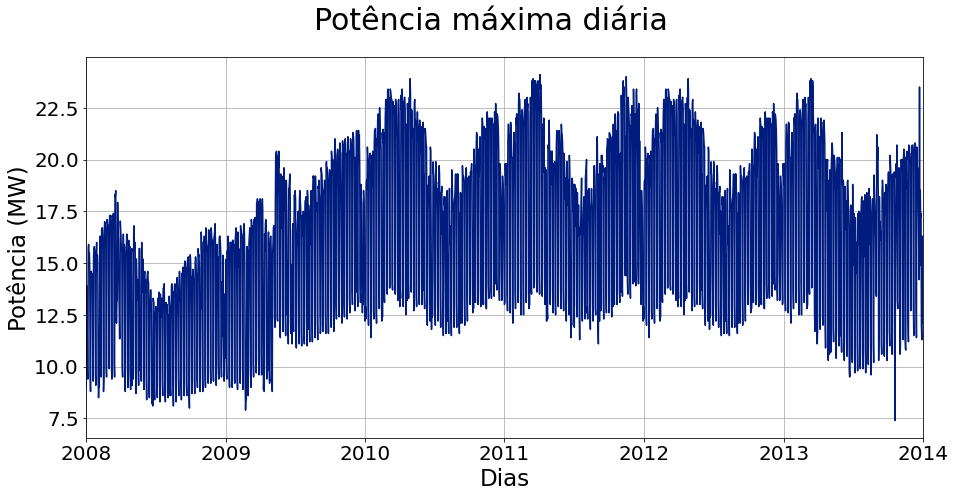

In [11]:
#selecionando a aparência do gráfico
plt.style.use('seaborn-dark-palette')

fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.plot(df_maxpot_dia) 


#título do plot
plt.suptitle('Potência máxima diária',size=30)

#determinando o nome dos eixos
ax1.set_xlabel('Dias',size=23)
ax1.set_ylabel('Potência (MW)',size=23)

#determinando os limites dos eixos
ax1.set_xlim([dt.date(2008, 1, 1), dt.date(2014, 1, 1)])

#determinando tamanho dos ticks
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)

plt.grid()
plt.show()

#salvando a figura na pasta /Plots com o nome de "Potencia-Diaria.png"  
path_plot_diario = Path('./Plots/Potencia-Diaria.png')
fig1.savefig(path_plot_diario, format='png')

##### Não compreendi o porquê de aparecer somente os anos no eixo horizontal, o desejado seria aparecer os dias também?

### Gráfico da potência máxima semanal

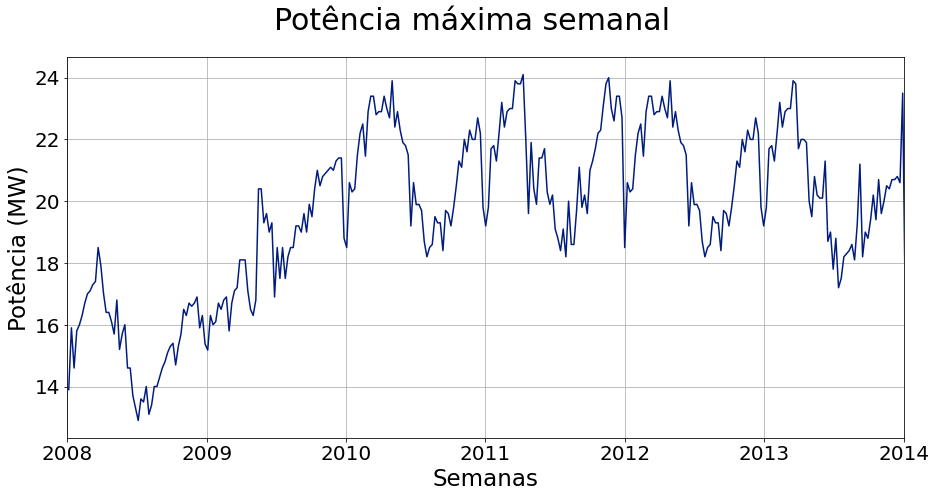

In [12]:
fig2 , ax2 = plt.subplots(figsize=(15,7))
ax2.plot(df_maxpot_semana)

#título do plot
plt.suptitle('Potência máxima semanal',size=30)

#determinando o nome dos eixos
ax2.set_xlabel('Semanas',size=23)
ax2.set_ylabel('Potência (MW)',size=23)

#determinando os limites dos eixos
ax2.set_xlim([dt.date(2008, 1, 1), dt.date(2014, 1, 1)])

#determinando tamanho dos ticks
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)

plt.grid()
plt.show()


#salvando a figura na pasta /Plots com o nome de "Potencia-Semanal.png"  
path_plot_semanal = Path('./Plots/Potencia-Semanal.png')
fig2.savefig(path_plot_semanal, format='png')